In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **1.Walmart Data Analysis**

In [ ]:
#Reading data
walmart=pd.read_csv("/content/walmart_purchase_data.csv")
walmart.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [ ]:
#Number of rows and columns
walmart.shape

(10000, 14)

In [ ]:
#baisc info of all the columns
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
# count of null values
walmart.isnull().sum()


Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

So,there are no null values in the dataset.


In [ ]:
#Column names
print(walmart.columns)


Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price', 'Domain'],
      dtype='object')


In [ ]:
#statistical calculations
walmart.describe()

,Credit Card,CC Security Code,Purchase Price
count,1.000000e+04,10000.000000,10000.000000
mean,2.341374e+15,907.217800,50.347302
std,2.256103e+15,1589.693035,29.015836
min,6.040186e+10,0.000000,0.000000
25%,3.056322e+13,280.000000,25.150000
50%,8.699942e+14,548.000000,50.505000
75%,4.492298e+15,816.000000,75.770000
max,6.012000e+15,9993.000000,99.990000


In [ ]:
# Total 8653 companies
num_unique = walmart['Company'].nunique()
print(num_unique)

8653


In [ ]:
# How many languages are in total
unique_values = walmart['Language'].unique()
print(unique_values)
top_1 = walmart['Language'].value_counts().head(1)
bottom_1 = walmart['Language'].value_counts().tail(1)
print('Most used language by the people:',top_1.index[0])
print('Least used language by the people:',bottom_1.index[0])


['el' 'fr' 'de' 'es' 'ru' 'pt' 'zh' 'en' 'it']
Most used language by the people: de
Least used language by the people: zh


### **2.Correlation using scatter plot**

<Axes: xlabel='AM or PM', ylabel='Purchase Price'>

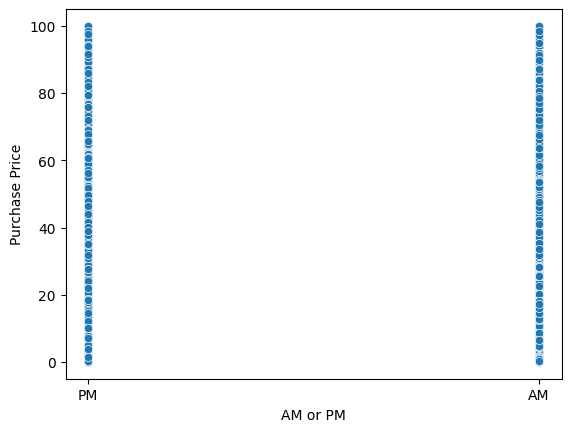

In [ ]:
#using scatter plot for correlation in columns
sns.scatterplot(x='AM or PM',y='Purchase Price',data=walmart)

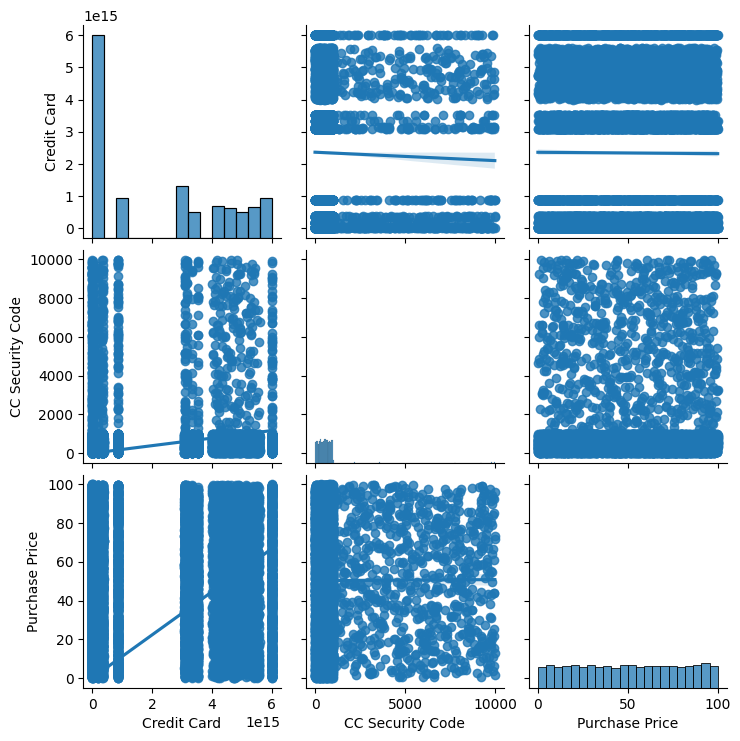

In [ ]:
sns.pairplot(data=walmart,kind="reg")
plt.show()

### **3.Are there any outliers?**

<Axes: >

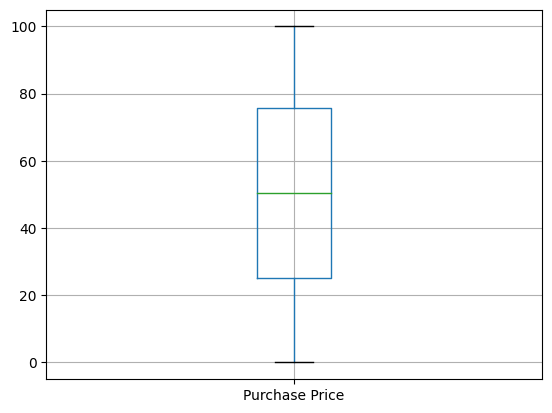

In [ ]:
walmart[["Purchase Price"]].boxplot()

From above plot,we can say,

There is no outliers in the dataset.

& Data is symmetric.


### **4.Average Purchase Price.**

In [ ]:
print('Average Purchase Price  is ',walmart['Purchase Price'].mean())

Average Purchase Price  is  50.347302


### **5.Highest and Lowest Purchase Price**

In [ ]:
print('Highest Purchase price is :',walmart['Purchase Price'].max())
print('Lowest Purchase price is :',walmart['Purchase Price'].min())

Highest Purchase price is : 99.99
Lowest Purchase price is : 0.0


### **6. Number of People having English(en) as their Language.**

In [ ]:
English_people=walmart['Language'][walmart['Language']=='en'].count()
print('Number of people having "en" Language :',English_people)

Number of people having "en" Language : 1098


### **7. Email of the person with given Credit Card Number.**

In [ ]:
required_email=walmart['Email'][walmart['Credit Card']==4926535242672853]
print('Email for given credit Card Number is: ',required_email.values[0])

Email for given credit Card Number is:  bondellen@williams-garza.com


### **8.Purchase Price for for lot:"90 WT"**

In [ ]:
required_PP=walmart['Purchase Price'][walmart['Lot']=="90 WT"]
print('Email for given credit Card Number is: ',required_PP.values[0])

Email for given credit Card Number is:  75.1


### **9.Number of people having CC Provider='American Express' and made Purchse > $95**

In [ ]:
Number_of_people=walmart['Purchase Price'][(walmart['CC Provider']=="American Express") & (walmart['Purchase Price']>95)].count()

print('Email for given credit Card Number is: ',Number_of_people)

Email for given credit Card Number is:  39


### **10.Number of people with credit card expiring in 2055.**

In [ ]:
expiring_2025 = walmart[walmart['CC Exp Date'].str[-2:] == '25']
count = len(expiring_2025)
print('Number of people with credit card expiring in year 2025 are: ',count)

Number of people with credit card expiring in year 2025 are:  1033


### **11.Top 5 most popular email povider**

In [ ]:
# Extract domain names from email addresses
walmart['Domain'] = walmart['Email'].str.split('@').str[-1]
top_5 = walmart['Domain'].value_counts().head(5)

# Print the result
print(top_5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Domain, dtype: int64


### **12.What are the 5 most common job titles**

In [ ]:
top_5 = walmart['Job'].value_counts().head(5)
print('Top 5 most common job titles are:')
print(top_5)

Top 5 most common job titles are:
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64


### **13.How many people make purchase during morning and evening.:**

In [ ]:
morning=walmart['AM or PM'][walmart['AM or PM']=='AM'].count()
evening=walmart['AM or PM'][walmart['AM or PM']=='PM'].count()
print('Number of people making purchase during morning are :',morning)
print('Number of people making purchase during evening are :',evening)

Number of people making purchase during morning are : 4932
Number of people making purchase during evening are : 5068


**from answer 13,** 

**Number of people making purchase during evening are more than morning.**